In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sc

In [2]:
data = pd.read_excel('Test Exer 1 Data.xls')
data = data.drop('Observation', axis = 1)

In [3]:
X = data['Age'] #Assigning X
y = data['Expenditures'] #Assigning y

# *a)* Finding the coefficients *a* and *b*

### Here, 'intercept' is *b* while the 'X' is *a*

In [4]:
import statsmodels.formula.api as smf #Importing library
mod = smf.ols('y ~ X', data=data) #Establishing data for Regression Results
res = mod.fit() #Fitting Data
print(res.summary()) #Printing results table

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     12.24
Date:                Sun, 17 Oct 2021   Prob (F-statistic):            0.00185
Time:                        19:07:52   Log-Likelihood:                -78.076
No. Observations:                  26   AIC:                             160.2
Df Residuals:                      24   BIC:                             162.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.2411      3.882     29.428      0.0

## Alternate method

In [5]:
a, b = np.polyfit(X, y, 1) #Assigning a and b
print(a, b) #The values are same as obtained by the previous method

-0.33359609660627654 114.2411079549316


# *b)* Graphical interpretation(s)

## Scatter plot

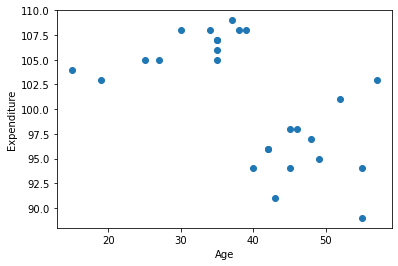

In [6]:
plt.scatter(X, y) #Scattering data
plt.xlabel('Age') #Setting the label for the x-axis
plt.ylabel('Expenditure') #Setting the label for the y-axis
plt.show()

## Scatter plot and Regression line

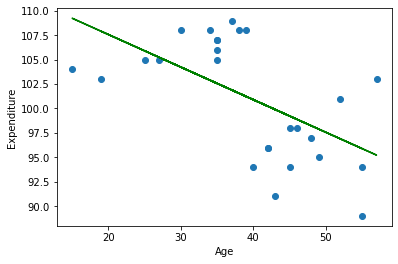

In [7]:
plt.scatter(X, y) #Scattering the data
plt.plot(X, a*X + b, c = 'green') #Plotting the regression line
plt.xlabel('Age') #Setting the label for the x-axis
plt.ylabel('Expenditure') #Setting the label for the y-axis
plt.show()

We can, at first glance, clearly see that there seem to be two different clusters of data points in the data: one roughly before *X=40* and the other when *X>40*. We can also see that even though the regression line passes roughly through the center of the observations, the distance between the line and the observations is significant, indicating that the data is not well-predicted through linear regression. We also notice that since the line is pointing downward, and the slope negative (*a = -0.336*), the expenditure (the dependent variable on y axis) decreases as the age of customers (the independent variable on the x axis) increases.

# *c)* Division of Data into clusters

## Division of Data

In [8]:
# Erstwhile empty lists
age1 = []
expend1 = []
age2 = []
expend2 = []

for i in range(len(data.index.values)): #Beginning of loop that extends till the number of data points in the data are extiguished
    if data['Age'].values[i] < 40: #Conditionality statement checking whether the age of the consumer is less than 40
        age1.append(data.iloc[i, 0]) #If age is less than 40, the age will be added to the first list
        expend1.append(data.iloc[i, 1]) #If age is less than 40, the consumer's expenditure will be added to the second list
    else: #Checking if the age of the consumer is > 40
        age2.append(data.iloc[i, 0]) #If age is = or > than 40, the age will be added to the third list
        expend2.append(data.iloc[i, 1]) #If age is = or > than 40, the consumer's expenditure will be added to the fourth list

In [9]:
# Expressing divided data in mathematical terms and converting them to series'
X1 = pd.Series(age1)
y1 = pd.Series(expend1)
X2 = pd.Series(age2)
y2 = pd.Series(expend2)

## Finding *a* and *b*

### Cluster 1

In [16]:
a1, b1 = np.polyfit(X1, y1, 1) #a and b for customers below 40 years of age

a1, b1

(0.19797127877820697, 100.23227718258495)

### Cluster 2

In [17]:
a2, b2 = np.polyfit(X2, y2, 1) #a and b for customers equal and above 40 years of age

a2, b2

(0.1464708282333743, 88.87188902488779)

## Graphical Interpretations

### Cluster 1

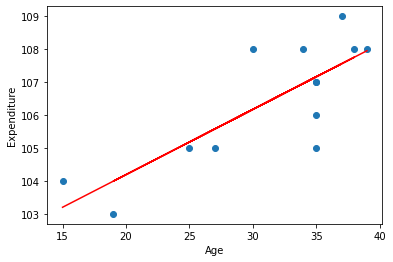

In [11]:
plt.scatter(X1, y1) #Scattering data
plt.plot(X1, a1*X1 + b1, c = 'red') #Plotting the regression line
plt.xlabel('Age') #Setting the label for the x-axis
plt.ylabel('Expenditure') #Setting the label for the y-axis
plt.show()

### Cluster 2

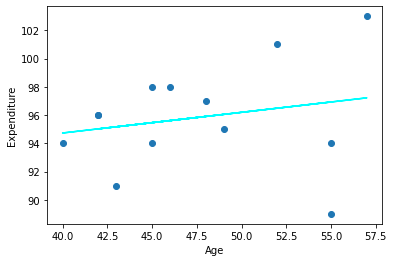

In [12]:
plt.scatter(X2, y2) #Scattering data
plt.plot(X2, a2*X2 + b2, c = 'cyan') #Plotting the regression line
plt.xlabel('Age') #Setting the label for the x-axis
plt.ylabel('Expenditure') #Setting the label for the y-axis
plt.show()

## Finding t-values and standard errors for *b*

In [13]:
data1 = pd.merge(pd.DataFrame(X1), pd.DataFrame(y1), on = X1.index) #Making the cluster 1 data points to a single data set
data2 = pd.merge(pd.DataFrame(X2), pd.DataFrame(y2), on = X2.index) #Making the cluster 2 data points to a single data set

In [14]:
mod = smf.ols('y1 ~ X1', data = data1) #Establishing data for Regression Results
res = mod.fit() #Fitting the Data
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     19.90
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           0.000962
Time:                        19:07:52   Log-Likelihood:                -19.212
No. Observations:                  13   AIC:                             42.42
Df Residuals:                      11   BIC:                             43.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    100.2323      1.416     70.791      0.0

/Users/hardiksrivastav/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In the case of the first cluster (age of consumers < 40), *b* (intercept) has the standard error of 1.416 and a t-value of 70.791

In [15]:
mod = smf.ols('y2 ~ X2', data=data2) #Establishing data for Regression Results
res = mod.fit() #Fitting data
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.5507
Date:                Sun, 17 Oct 2021   Prob (F-statistic):              0.474
Time:                        19:07:52   Log-Likelihood:                -34.827
No. Observations:                  13   AIC:                             73.65
Df Residuals:                      11   BIC:                             74.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     88.8719      9.458      9.396      0.0

In the case of the second cluster (age of consumers = or > 40), *b* (intercept) has the standard error of 9.458 and a t-value of 9.396

# *d)* Differences and Learnings

## Differences

1. The slope of the whole dataset is negative, but the slopes of the individual clusters is positive, indicating that putting both clusters on the same plot wouldn't be very beneficial for the company
2. The line is best fitted when the age of consumers is below 40, indicating that these consumer's expenditures are most affected by their age. This is also reflected by the t-value of the cluster. For consumers above 40 years of age, the expenditure is barely explained by their age, also reflected by the considerably lower t-value. As is expected, the t-value and fit of the general dataset is in the middle

## Learnings

1. In general, expenditure on travel decreases as the age of the consumers increases. However, when dividing the dataset between consumers younger and older than 40, the expenditure increases as the age increases, especially in the case of consumers above 40 years of age.
2. Age, even though a good predictor of expenditure, might not be the best explaining factor for the expenditure of clients on travel